In [232]:
import networkx as nx
G = nx.Graph()
G.add_edge('A','B')
G.add_edge('C','D')

In [233]:
G1 = nx.DiGraph()
G1.add_edge('A','B')
G1.add_edge('C','D')

In [234]:
G2 = nx.Graph()
G2.add_edge('A','B',weight=6)
G2.add_edge('C','D',weight=13)

# Signed Network 

In [235]:
#whose ur friend whose ur enemy best frient or not 
G3 = nx.Graph()
G3.add_edge('A','B',sign='+')
G3.add_edge('C','D',sign='-')

In [236]:
G4 = nx.Graph()
G4.add_edge('A','B',relation='friend')
G4.add_edge('C','D',relation='family')

# Multigraphs

In [237]:
#a pair of nodes can have a diff types of relationships simultaneously
#network where multuple edges can connect the same nodes (parallel edges)
G5 = nx.MultiGraph()
G5.add_edge('A','B',relation='friend',weight=5)
G5.add_edge('C','D',relation='family',weight=6)
G5.add_edge('A','B',relation='neighbours',weight=7)
G5.add_edge('C','D',relation='workers',weight=8)

1

In [238]:
G6 = nx.Graph()
G6.add_edge('A','B',weight=6,relation='friend')
G6.add_edge('C','D',weight=13,relation='family')
G6.edges()#list of all edges

EdgeView([('A', 'B'), ('C', 'D')])

In [239]:
G6.edges(data=True)#list of all edges with attributes 

EdgeDataView([('A', 'B', {'weight': 6, 'relation': 'friend'}), ('C', 'D', {'weight': 13, 'relation': 'family'})])

In [240]:
G6.edges(data='relation')

EdgeDataView([('A', 'B', 'friend'), ('C', 'D', 'family')])

In [241]:
G6.edges(data='weight')

EdgeDataView([('A', 'B', 6), ('C', 'D', 13)])

In [242]:
#accessing attrbutes of a specific edge ... just use edge not edges 
#G6.edges(['A']['B'])
G6['A']['B']

{'weight': 6, 'relation': 'friend'}

In [243]:
G6['A']['B']['weight']

6

In [244]:
#multigraph G5
G5['A']['B']

AtlasView({0: {'relation': 'friend', 'weight': 5}, 1: {'relation': 'neighbours', 'weight': 7}})

In [245]:
G5['A']['B'][1]['relation']

'neighbours'

In [246]:
G7 = nx.MultiDiGraph()
G7.add_edge('A','B',relation='friend',weight=5)
G7.add_edge('C','D',relation='family',weight=6)
G7.add_edge('A','B',relation='neighbours',weight=7)
G7.add_edge('C','D',relation='workers',weight=8)

1

In [247]:
G7['A']['B']

AtlasView({0: {'relation': 'friend', 'weight': 5}, 1: {'relation': 'neighbours', 'weight': 7}})

In [248]:
#G7['B']['A'] #error ...cause it's a direct

In [249]:
#nodes can have particualr atrribure 
G8 = nx.Graph()
G8.add_edge('A','B',weight=6,relation='friend')
G8.add_edge('C','D',weight=13,relation='family')
G.add_node('A',role='trader')
G.add_node('B',role='teacher')
G.add_node('C',role='leader')
G8.nodes()

NodeView(('A', 'B', 'C', 'D'))

In [250]:
G8.nodes(data=True)

NodeDataView({'A': {}, 'B': {}, 'C': {}, 'D': {}})

In [251]:
#G8.node['A']['role']

# Bipartite Graphs

In [252]:
"""a graph is a bipartite graph if it has two sets of nodes which we call L and R,
and every single edge connects a node from L to R. So, no edge connects a node from L to another node in L,
and no edge connects a node in R to another node in R."""
from networkx.algorithms import bipartite
B = nx.Graph()
B.add_nodes_from(['A','B','C','D','E'],bipartite=0)#النودز هيبقوا عالجنب الشمال 
B.add_nodes_from([1,2,3,4,],bipartite=1)
#B.add_edges_from([('A',1),('B',1),('C',1),('C',3)('D',2),('E',3),('E',4)])

In [253]:
B.add_edges_from([('A',1),('B',1),('C',1),('C',3),('D',2),('E',3),('E',4)])

In [254]:
bipartite.is_bipartite(B)

True

In [255]:
bipartite.is_bipartite(B)

True

In [256]:
"""Now notice that if we were to add the edge A, B. So these would add the nodes like this right here.
Then now the graph B is no longer bipartite, because there aren't two sets that are,
such that all the edges go from one side to the other. 
I'm breaking the rule when I add this edge right here, and so then when I ask if B is bipartite,
it would say false, because it's no longer bipartite."""
B.add_edge('A','B')
bipartite.is_bipartite(B)

False

In [257]:
B.remove_edge('A','B')
bipartite.is_bipartite(B)

True

In [258]:
#check of set of nodes is a bipartition graph
X=set([1,2,3,4])
bipartite.is_bipartite_node_set(B,X)

True

In [259]:
X1=set(['A','B','C','D','e'])
bipartite.is_bipartite_node_set(B,X1)

False

In [260]:
#getting each set of nodes of bipartite graph
#bipartite.sets(B) ...i don't know why this is wrong

# projected graph

In [270]:
"""L-bipartite graph projection : network of nodes in group L where a paires of nodes is connected if they have a common neighbour 
    in R in bipartite graph"""
B1=nx.Graph()
B1.add_nodes_from(['A','B','C','D','E','F','G','H','I','J'],bipartite=0)
B1.add_nodes_from([1,2,3,4],bipartite=0)
B1.add_edges_from([('A',1),('B',1),('C',1),('D',1),('H',1),('B',2),('C',2),('E',2),('G',2),
                   ('E',3),('F',3),('H',3),('J',3),('E',4),('I',4),('J',4)])

<IPython.core.display.Javascript object>


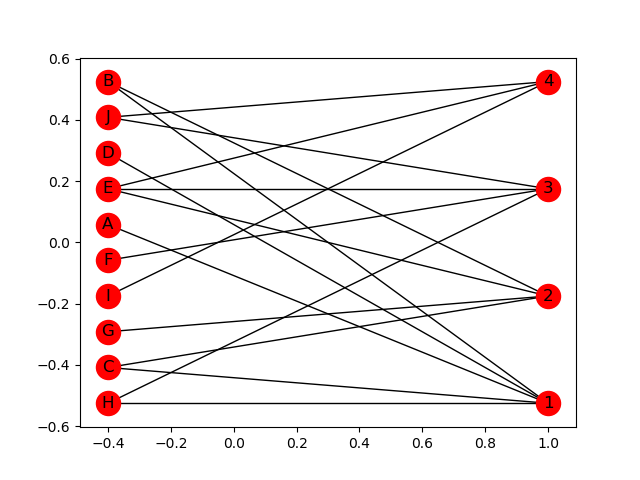

In [271]:
%matplotlib notebook
X2=set(['A','B','C','D','E','F','G','H','I','J'])


nx.draw_networkx(
    B1,
    pos = nx.drawing.layout.bipartite_layout(B1, X2), 
    width = 1)

In [210]:
P= bipartite.projected_graph(B1,X2)

In [272]:
X22=set([1,2,3,4])
P1=bipartite.projected_graph(B1,X22)
#may be i need weight project graph

In [273]:
P2=bipartite.weighted_projected_graph(B1,X22)

In [274]:
print(list(P))

['H', 'C', 'G', 'I', 'F', 'A', 'E', 'D', 'J', 'B']


In [275]:
B = nx.Graph()
B.add_edges_from([('A', 'G'),('A','I'), ('B','H'), ('C', 'G'), ('C', 'I'),('D', 'H'), ('E', 'I'), ('F', 'G'), ('F', 'J')])
X1 = set(['A', 'B', 'C', 'D', 'E', 'F'])
G0 = bipartite.collaboration_weighted_projected_graph(B, X1)

In [276]:
list(G0)

['C', 'F', 'A', 'E', 'D', 'B']

# Loading Graphs in NetworkX

<IPython.core.display.Javascript object>


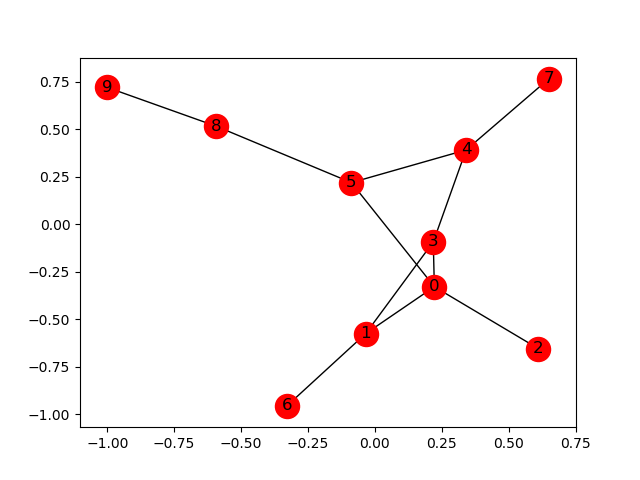

In [277]:
%matplotlib notebook
import numpy as np
import pandas as pd 
G9 = nx.Graph()
# add node/edge pairs
G9.add_edges_from([(0, 1),
                   (0, 2),
                   (0, 3),
                   (0, 5),
                   (1, 3),
                   (1, 6),
                   (3, 4),
                   (4, 5),
                   (4, 7),
                   (5, 8),
                   (8, 9)])

# draw the network G9
nx.draw_networkx(G9)
#المفروض الرسمة متتطلغش مرعبة كدا

# Adjacency List
G_adjlist.txt is the adjaceny list representation of G1.

It can be read as follows:

- 0 1 2 3 5  →→  node 0 is adjacent to nodes 1, 2, 3, 5
- 1 3 6  →→  node 1 is (also) adjacent to nodes 3, 6
- 2  →→  node 2 is (also) adjacent to no new nodes
- 3 4  →→  node 3 is (also) adjacent to node 4


and so on. Note that adjacencies are only accounted for once (e.g. node 2 is adjacent to node 0, but node 0 is not listed in node 2's row, because that edge has already been accounted for in node 0's row).

In [278]:
#The adjacency list format is useful for graphs without nodes or edge attributes
!cat G_adjlist.txt

'cat' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
G10 = nx.read_adjlist('G_adjlist.txt', nodetype=int)
G2.edges()